LGBM 01 con linear_tree = true

In [1]:
# üì¶ Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import random

# üé≤ Configurar semillas para reproductibilidad
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("‚úÖ Librer√≠as importadas correctamente")
print(f"üé≤ Semilla configurada: {SEED} para reproductibilidad total")

‚úÖ Librer√≠as importadas correctamente


In [2]:
# üìÑ Cargar todos los datasets
print("Cargando datasets...")

# Load the sales data (tab-delimited)
sales = pd.read_csv("datasets/sell-in.txt", sep="\t", dtype={"periodo": str})
print(f"‚úÖ Sales data cargado: {sales.shape}")

# Load the stocks data (tab-delimited) 
stocks = pd.read_csv("datasets/tb_stocks.txt", sep="\t", dtype={"periodo": str})
print(f"‚úÖ Stocks data cargado: {stocks.shape}")

# Load the product information data (tab-delimited)
product_info = pd.read_csv("datasets/tb_productos.txt", sep="\t")
print(f"‚úÖ Product info cargado: {product_info.shape}")

# Carga productos a predecir
product_predict = pd.read_csv("datasets/product_id_apredecir201912.txt", sep="\t", header=0)
print(f"‚úÖ Productos a predecir cargados: {product_predict.shape}")

print("\nüéØ Todos los datasets cargados exitosamente")

Cargando datasets...
‚úÖ Sales data cargado: (2945818, 7)
‚úÖ Stocks data cargado: (13691, 3)
‚úÖ Product info cargado: (1251, 7)
‚úÖ Productos a predecir cargados: (780, 1)

üéØ Todos los datasets cargados exitosamente
‚úÖ Sales data cargado: (2945818, 7)
‚úÖ Stocks data cargado: (13691, 3)
‚úÖ Product info cargado: (1251, 7)
‚úÖ Productos a predecir cargados: (780, 1)

üéØ Todos los datasets cargados exitosamente


In [3]:
# üîç Explorar estructura de los datos
print("EXPLORACI√ìN DE DATOS")
print("="*50)

print("\nüìä SALES DATA:")
print(f"Columnas: {list(sales.columns)}")
print(f"Per√≠odos √∫nicos: {sales['periodo'].nunique()}")
print(f"Productos √∫nicos: {sales['product_id'].nunique()}")
print("Primeras filas:")
print(sales.head())

print("\nüì¶ STOCKS DATA:")
print(f"Columnas: {list(stocks.columns)}")
print(f"Per√≠odos √∫nicos: {stocks['periodo'].nunique()}")
print(f"Productos √∫nicos: {stocks['product_id'].nunique()}")
print("Primeras filas:")
print(stocks.head())

print("\nüè∑Ô∏è PRODUCT INFO:")
print(f"Columnas: {list(product_info.columns)}")
print(f"Productos √∫nicos: {product_info['product_id'].nunique()}")
print("Primeras filas:")
print(product_info.head())

print("\nüéØ PRODUCTOS A PREDECIR:")
print(f"Columnas: {list(product_predict.columns)}")
print(f"Total productos a predecir: {len(product_predict)}")
print("Primeras filas:")
print(product_predict.head())

EXPLORACI√ìN DE DATOS

üìä SALES DATA:
Columnas: ['periodo', 'customer_id', 'product_id', 'plan_precios_cuidados', 'cust_request_qty', 'cust_request_tn', 'tn']
Per√≠odos √∫nicos: 36
Productos √∫nicos: 1233
Primeras filas:
  periodo  customer_id  product_id  plan_precios_cuidados  cust_request_qty  \
0  201701        10234       20524                      0                 2   
1  201701        10032       20524                      0                 1   
2  201701        10217       20524                      0                 1   
3  201701        10125       20524                      0                 1   
4  201701        10012       20524                      0                11   

   cust_request_tn       tn  
0          0.05300  0.05300  
1          0.13628  0.13628  
2          0.03028  0.03028  
3          0.02271  0.02271  
4          1.54452  1.54452  

üì¶ STOCKS DATA:
Columnas: ['periodo', 'product_id', 'stock_final']
Per√≠odos √∫nicos: 15
Productos √∫nicos: 1095
Primer

In [4]:
# üîó Verificar consistencia entre datasets
print("VERIFICACI√ìN DE CONSISTENCIA")
print("="*50)

# Productos √∫nicos en cada dataset
productos_sales = set(sales['product_id'].unique())
productos_stocks = set(stocks['product_id'].unique())
productos_info = set(product_info['product_id'].unique())

# Si product_predict tiene columna product_id
if 'product_id' in product_predict.columns:
    productos_predict = set(product_predict['product_id'].unique())
else:
    # Si la primera columna contiene los product_ids
    primera_columna = product_predict.columns[0]
    productos_predict = set(product_predict[primera_columna].unique())
    print(f"‚ö†Ô∏è Usando columna '{primera_columna}' como product_id")

print(f"üìä Productos en sales: {len(productos_sales)}")
print(f"üì¶ Productos en stocks: {len(productos_stocks)}")
print(f"üè∑Ô∏è Productos en product_info: {len(productos_info)}")
print(f"üéØ Productos a predecir: {len(productos_predict)}")

# Verificar intersecciones
print(f"\nüîç INTERSECCIONES:")
print(f"Sales ‚à© Stocks: {len(productos_sales & productos_stocks)}")
print(f"Sales ‚à© Product_info: {len(productos_sales & productos_info)}")
print(f"Sales ‚à© Productos_predict: {len(productos_sales & productos_predict)}")
print(f"Stocks ‚à© Productos_predict: {len(productos_stocks & productos_predict)}")
print(f"Product_info ‚à© Productos_predict: {len(productos_info & productos_predict)}")

# Verificar rangos de fechas
print(f"\nüìÖ RANGOS DE FECHAS:")
print(f"Sales - per√≠odos: {sales['periodo'].min()} a {sales['periodo'].max()}")
print(f"Stocks - per√≠odos: {stocks['periodo'].min()} a {stocks['periodo'].max()}")

VERIFICACI√ìN DE CONSISTENCIA
üìä Productos en sales: 1233
üì¶ Productos en stocks: 1095
üè∑Ô∏è Productos en product_info: 1251
üéØ Productos a predecir: 780

üîç INTERSECCIONES:
Sales ‚à© Stocks: 1095
Sales ‚à© Product_info: 1188
Sales ‚à© Productos_predict: 780
Stocks ‚à© Productos_predict: 779
Product_info ‚à© Productos_predict: 780

üìÖ RANGOS DE FECHAS:
Sales - per√≠odos: 201701 a 201912
Stocks - per√≠odos: 201810 a 201912


In [5]:
# üì¶ Instalar e importar LightGBM, Optuna y librer√≠as adicionales
# %pip install lightgbm optuna

import lightgbm as lgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# üé≤ Configurar semillas adicionales para reproductibilidad
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Configurar semilla para matplotlib (si se usa)
plt.rcParams['figure.max_open_warning'] = 0

print("‚úÖ LightGBM, Optuna y librer√≠as ML importadas correctamente")
print(f"üé≤ Todas las semillas configuradas con SEED={SEED} para reproductibilidad")

‚úÖ LightGBM, Optuna y librer√≠as ML importadas correctamente


In [6]:
# üßπ Preparaci√≥n de datos para el modelo LightGBM
print("PREPARACI√ìN DE DATOS PARA LGBM - GRANULARIDAD POR PRODUCTO")
print("="*60)

# Convertir per√≠odo a datetime para facilitar manipulaci√≥n
sales['fecha'] = pd.to_datetime(sales['periodo'], format='%Y%m')
stocks['fecha'] = pd.to_datetime(stocks['periodo'], format='%Y%m')

# Filtrar solo productos que necesitamos predecir
if 'product_id' in product_predict.columns:
    productos_objetivo = product_predict['product_id'].tolist()
else:
    productos_objetivo = product_predict[product_predict.columns[0]].tolist()

print(f"üéØ Productos objetivo: {len(productos_objetivo)}")

# Filtrar sales y stocks para productos objetivo
sales_filtered = sales[sales['product_id'].isin(productos_objetivo)].copy()
stocks_filtered = stocks[stocks['product_id'].isin(productos_objetivo)].copy()

print(f"üìä Sales filtradas: {sales_filtered.shape}")
print(f"üì¶ Stocks filtradas: {stocks_filtered.shape}")

# AGREGACI√ìN POR PRODUCTO: Sumar por producto y per√≠odo (agregando todos los clientes)
sales_agg = sales_filtered.groupby(['product_id', 'fecha', 'periodo']).agg({
    'tn': 'sum',                    # Total toneladas por producto
    'customer_id': 'nunique',       # N√∫mero de clientes √∫nicos
    'cust_request_qty': 'sum',      # Total cantidad solicitada
    'cust_request_tn': 'sum'        # Total toneladas solicitadas
}).reset_index()

# Renombrar columnas para claridad
sales_agg.rename(columns={
    'customer_id': 'num_customers',
    'cust_request_qty': 'total_request_qty', 
    'cust_request_tn': 'total_request_tn'
}, inplace=True)

print(f"üìà Sales agregadas por producto: {sales_agg.shape}")
print("Primeras filas de sales agregadas:")
print(sales_agg.head())

print(f"\nüìä Estad√≠sticas por producto:")
print(f"  Promedio tn por producto-per√≠odo: {sales_agg['tn'].mean():.2f}")
print(f"  Promedio clientes por producto-per√≠odo: {sales_agg['num_customers'].mean():.2f}")
print(f"  Productos √∫nicos: {sales_agg['product_id'].nunique()}")
print(f"  Per√≠odos √∫nicos: {sales_agg['periodo'].nunique()}")

PREPARACI√ìN DE DATOS PARA LGBM - GRANULARIDAD POR PRODUCTO
üéØ Productos objetivo: 780
üìä Sales filtradas: (2293481, 8)
üì¶ Stocks filtradas: (10727, 4)
üìä Sales filtradas: (2293481, 8)
üì¶ Stocks filtradas: (10727, 4)
üìà Sales agregadas por producto: (22349, 7)
Primeras filas de sales agregadas:
   product_id      fecha periodo          tn  num_customers  \
0       20001 2017-01-01  201701   934.77222            186   
1       20001 2017-02-01  201702   798.01620            185   
2       20001 2017-03-01  201703  1303.35771            188   
3       20001 2017-04-01  201704  1069.96130            104   
4       20001 2017-05-01  201705  1502.20132            238   

   total_request_qty  total_request_tn  
0                479         937.72717  
1                432         833.72187  
2                509        1330.74697  
3                279        1132.94430  
4                701        1550.68936  

üìä Estad√≠sticas por producto:
  Promedio tn por producto-per√≠o

In [7]:
# üîß Crear features de lag y combinar con stocks - GRANULARIDAD POR PRODUCTO
print("CREACI√ìN DE FEATURES POR PRODUCTO")
print("="*50)

# Crear features de lag para cada producto
def create_lag_features(df, product_col, value_col, date_col, lags=[1, 2, 3, 6, 12]):
    """Crear features de lag para series temporales por producto"""
    df_features = df.copy()
    df_features = df_features.sort_values([product_col, date_col])
    
    for lag in lags:
        df_features[f'{value_col}_lag_{lag}'] = df_features.groupby(product_col)[value_col].shift(lag)
    
    return df_features

# Crear lags para ventas (tn) por producto
sales_with_lags = create_lag_features(
    sales_agg, 
    'product_id', 
    'tn', 
    'fecha', 
    lags=[1, 2, 3, 6, 12]
)

# Crear lags para n√∫mero de clientes por producto
sales_with_lags = create_lag_features(
    sales_with_lags, 
    'product_id', 
    'num_customers', 
    'fecha', 
    lags=[1, 2, 3]
)

# Crear lags para solicitudes de clientes
sales_with_lags = create_lag_features(
    sales_with_lags, 
    'product_id', 
    'total_request_tn', 
    'fecha', 
    lags=[1, 2, 3]
)

print(f"üìä Sales con lags por producto: {sales_with_lags.shape}")

# Agregar datos de stock por producto
stocks_agg = stocks_filtered.groupby(['product_id', 'fecha', 'periodo']).agg({
    'stock_final': ['mean', 'sum', 'std']  # Stock promedio, total y desviaci√≥n est√°ndar por producto
}).reset_index()

# Aplanar columnas multinivel
stocks_agg.columns = ['product_id', 'fecha', 'periodo', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std']
stocks_agg['stock_tn_std'] = stocks_agg['stock_tn_std'].fillna(0)  # Rellenar NaN en std

# Combinar sales y stocks por producto
data_combined = pd.merge(
    sales_with_lags, 
    stocks_agg[['product_id', 'fecha', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std']], 
    on=['product_id', 'fecha'], 
    how='left'
)

# Crear lags para stock por producto
data_combined = create_lag_features(
    data_combined, 
    'product_id', 
    'stock_tn_mean', 
    'fecha', 
    lags=[1, 2, 3]
)

data_combined = create_lag_features(
    data_combined, 
    'product_id', 
    'stock_tn_sum', 
    'fecha', 
    lags=[1, 2]
)

print(f"üì¶ Datos combinados con stock por producto: {data_combined.shape}")
print(f"Columnas disponibles: {len(data_combined.columns)}")
print("\nPrimeras columnas:")
print(data_combined.columns.tolist()[:15])
print("√öltimas columnas:")
print(data_combined.columns.tolist()[-10:])

CREACI√ìN DE FEATURES POR PRODUCTO
üìä Sales con lags por producto: (22349, 18)
üì¶ Datos combinados con stock por producto: (22349, 26)
Columnas disponibles: 26

Primeras columnas:
['product_id', 'fecha', 'periodo', 'tn', 'num_customers', 'total_request_qty', 'total_request_tn', 'tn_lag_1', 'tn_lag_2', 'tn_lag_3', 'tn_lag_6', 'tn_lag_12', 'num_customers_lag_1', 'num_customers_lag_2', 'num_customers_lag_3']
√öltimas columnas:
['total_request_tn_lag_2', 'total_request_tn_lag_3', 'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std', 'stock_tn_mean_lag_1', 'stock_tn_mean_lag_2', 'stock_tn_mean_lag_3', 'stock_tn_sum_lag_1', 'stock_tn_sum_lag_2']


In [8]:
# üéØ Crear target y features adicionales
print("CREACI√ìN DE TARGET Y FEATURES ADICIONALES")
print("="*50)

# Crear target: tn de 2 per√≠odos a futuro
data_combined = data_combined.sort_values(['product_id', 'fecha'])
data_combined['target'] = data_combined.groupby('product_id')['tn'].shift(-2)

# Crear features temporales
data_combined['mes'] = data_combined['fecha'].dt.month
data_combined['trimestre'] = data_combined['fecha'].dt.quarter
data_combined['a√±o'] = data_combined['fecha'].dt.year

# Crear features estad√≠sticas m√≥viles
def create_rolling_features(df, product_col, value_col, date_col, windows=[3, 6, 12]):
    """Crear features de ventanas m√≥viles"""
    df = df.sort_values([product_col, date_col])
    
    for window in windows:
        df[f'{value_col}_rolling_mean_{window}'] = df.groupby(product_col)[value_col].rolling(window, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'{value_col}_rolling_std_{window}'] = df.groupby(product_col)[value_col].rolling(window, min_periods=1).std().reset_index(level=0, drop=True)
    
    return df

# Crear rolling features para ventas
data_combined = create_rolling_features(data_combined, 'product_id', 'tn', 'fecha', windows=[3, 6])

# Agregar informaci√≥n de productos si est√° disponible
if len(product_info) > 0:
    data_combined = pd.merge(
        data_combined, 
        product_info, 
        on='product_id', 
        how='left'
    )
    print(f"‚úÖ Informaci√≥n de productos agregada")

print(f"üìä Dataset final: {data_combined.shape}")
print(f"üìà Registros con target v√°lido: {data_combined['target'].notna().sum()}")

# Mostrar algunas estad√≠sticas del target
target_stats = data_combined['target'].describe()
print(f"\nüìä Estad√≠sticas del target:")
print(target_stats)

CREACI√ìN DE TARGET Y FEATURES ADICIONALES
‚úÖ Informaci√≥n de productos agregada
üìä Dataset final: (22349, 40)
üìà Registros con target v√°lido: 20789

üìä Estad√≠sticas del target:
count    20789.000000
mean        50.931444
std        127.140873
min          0.000890
25%          3.009870
50%         11.928920
75%         36.636220
max       2295.198320
Name: target, dtype: float64


In [9]:
# üìã Preparar datos para entrenamiento - GRANULARIDAD POR PRODUCTO
print("PREPARACI√ìN DE DATOS DE ENTRENAMIENTO POR PRODUCTO")
print("="*60)

# Filtrar registros con target v√°lido
train_data = data_combined[data_combined['target'].notna()].copy()
print(f"üìä Registros v√°lidos para entrenamiento: {len(train_data)}")

# Seleccionar features para el modelo con granularidad por producto
feature_columns = [
    # Lags de ventas (tn) por producto
    'tn_lag_1', 'tn_lag_2', 'tn_lag_3', 'tn_lag_6', 'tn_lag_12',
    
    # Lags de clientes por producto
    'num_customers_lag_1', 'num_customers_lag_2', 'num_customers_lag_3',
    
    # Lags de solicitudes por producto
    'total_request_tn_lag_1', 'total_request_tn_lag_2', 'total_request_tn_lag_3',
    
    # Lags de stock por producto
    'stock_tn_mean_lag_1', 'stock_tn_mean_lag_2', 'stock_tn_mean_lag_3',
    'stock_tn_sum_lag_1', 'stock_tn_sum_lag_2',
    
    # Features temporales
    'mes', 'trimestre', 'a√±o',
    
    # Rolling features por producto
    'tn_rolling_mean_3', 'tn_rolling_mean_6',
    'tn_rolling_std_3', 'tn_rolling_std_6',
    
    # Features actuales por producto
    'num_customers', 'total_request_qty', 'total_request_tn',
    'stock_tn_mean', 'stock_tn_sum', 'stock_tn_std'
]

# Verificar qu√© features existen
available_features = [col for col in feature_columns if col in train_data.columns]
missing_features = [col for col in feature_columns if col not in train_data.columns]

print(f"‚úÖ Features disponibles: {len(available_features)}")
print(f"‚ö†Ô∏è Features faltantes: {len(missing_features)}")
if missing_features:
    print(f"Features faltantes: {missing_features}")

# Usar solo features disponibles
feature_columns = available_features

# Preparar X e y
X = train_data[feature_columns].copy()
y = train_data['target'].copy()

# Rellenar valores nulos con 0 (para lags iniciales y stocks faltantes)
X = X.fillna(0)

print(f"üìä Shape de X: {X.shape}")
print(f"üìà Shape de y: {y.shape}")
print(f"üîç Valores nulos en X: {X.isnull().sum().sum()}")
print(f"üîç Valores nulos en y: {y.isnull().sum()}")

# Divisi√≥n temporal para validaci√≥n (√∫ltimos per√≠odos como validaci√≥n)
train_data_sorted = train_data.sort_values('fecha')
split_date = train_data_sorted['fecha'].quantile(0.8)  # 80% entrenamiento, 20% validaci√≥n

train_mask = train_data_sorted['fecha'] <= split_date
X_train = X.loc[train_mask]
X_val = X.loc[~train_mask] 
y_train = y.loc[train_mask]
y_val = y.loc[~train_mask]

print(f"\nüìä DIVISI√ìN TEMPORAL:")
print(f"Entrenamiento: {len(X_train)} registros (hasta {split_date.strftime('%Y-%m')})")
print(f"Validaci√≥n: {len(X_val)} registros (desde {split_date.strftime('%Y-%m')})")

print(f"\nüéØ PRODUCTOS EN ENTRENAMIENTO:")
productos_train = train_data.loc[train_mask, 'product_id'].nunique()
productos_val = train_data.loc[~train_mask, 'product_id'].nunique()
print(f"Productos √∫nicos en entrenamiento: {productos_train}")
print(f"Productos √∫nicos en validaci√≥n: {productos_val}")

print(f"\nFeatures seleccionadas para granularidad por producto:")
for i, feat in enumerate(feature_columns):
    print(f"  {i+1:2d}. {feat}")

PREPARACI√ìN DE DATOS DE ENTRENAMIENTO POR PRODUCTO
üìä Registros v√°lidos para entrenamiento: 20789
‚úÖ Features disponibles: 29
‚ö†Ô∏è Features faltantes: 0
üìä Shape de X: (20789, 29)
üìà Shape de y: (20789,)
üîç Valores nulos en X: 0
üîç Valores nulos en y: 0

üìä DIVISI√ìN TEMPORAL:
Entrenamiento: 16970 registros (hasta 2019-05)
Validaci√≥n: 3819 registros (desde 2019-05)

üéØ PRODUCTOS EN ENTRENAMIENTO:
Productos √∫nicos en entrenamiento: 718
Productos √∫nicos en validaci√≥n: 780

Features seleccionadas para granularidad por producto:
   1. tn_lag_1
   2. tn_lag_2
   3. tn_lag_3
   4. tn_lag_6
   5. tn_lag_12
   6. num_customers_lag_1
   7. num_customers_lag_2
   8. num_customers_lag_3
   9. total_request_tn_lag_1
  10. total_request_tn_lag_2
  11. total_request_tn_lag_3
  12. stock_tn_mean_lag_1
  13. stock_tn_mean_lag_2
  14. stock_tn_mean_lag_3
  15. stock_tn_sum_lag_1
  16. stock_tn_sum_lag_2
  17. mes
  18. trimestre
  19. a√±o
  20. tn_rolling_mean_3
  21. tn_rolling

In [ ]:
# üîß Optimizaci√≥n de hiperpar√°metros con Optuna para LINEAR_TREE
print("OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS CON OPTUNA - LINEAR_TREE")
print("="*60)

# üé≤ Configurar semilla para Optuna y reproductibilidad
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

def objective(trial):
    """Funci√≥n objetivo para optimizaci√≥n con Optuna incluyendo linear_tree"""
    
    # üé≤ Configurar semilla para cada trial
    np.random.seed(SEED + trial.number)
    random.seed(SEED + trial.number)
    
    # Sugerir hiperpar√°metros optimizados para linear_tree
    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'linear_tree': True,        # FIJO: Caracter√≠stica principal del modelo
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 2.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 2.0),
        'num_leaves': trial.suggest_int('num_leaves', 20, 120),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.15, log=True),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 40),
        'max_bin': trial.suggest_int('max_bin', 100, 400),
        'verbose': -1,
        'random_state': SEED + trial.number,  # Semilla √∫nica por trial
        'bagging_seed': SEED + trial.number,  # Semilla para bagging
        'feature_fraction_seed': SEED + trial.number  # Semilla para feature selection
    }
    
    # Crear datasets de LightGBM
    train_dataset = lgb.Dataset(X_train, label=y_train)
    val_dataset = lgb.Dataset(X_val, label=y_val, reference=train_dataset)
    
    # Entrenar modelo con validaci√≥n cruzada interna
    model = lgb.train(
        params,
        train_dataset,
        valid_sets=[val_dataset],
        num_boost_round=1000,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(0)  # Silenciar logs
        ]
    )
    
    # Predecir en conjunto de validaci√≥n
    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    # Calcular MAE como m√©trica a minimizar
    mae = mean_absolute_error(y_val, y_pred)
    
    return mae

# Crear estudio de optimizaci√≥n
print("üîç Iniciando optimizaci√≥n de hiperpar√°metros con LINEAR_TREE...")
print(f"üé≤ Usando semilla base {SEED} para reproducibilidad completa")

study = optuna.create_study(
    direction='minimize',
    sampler=optuna.samplers.TPESampler(seed=SEED),  # Semilla para el sampler
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10)
)

# Ejecutar optimizaci√≥n
n_trials = 50 #N√∫mero de pruebas
print(f"üöÄ Ejecutando {n_trials} trials de optimizaci√≥n para LINEAR_TREE...")
print(f"üé≤ Cada trial usa semilla: SEED + trial_number para reproductibilidad")

study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

# Mostrar mejores par√°metros
print(f"\n‚úÖ Optimizaci√≥n completada!")
print(f"üèÜ Mejor MAE encontrado: {study.best_value:.4f}")
print(f"\nüîß HIPERPAR√ÅMETROS OPTIMIZADOS PARA LINEAR_TREE:")
best_params = study.best_params
print("="*65)
print(f"   linear_tree:      True (FIJO - Caracter√≠stica principal) ‚≠ê")
print(f"   lambda_l1:        {best_params['lambda_l1']:.4f}")
print(f"   lambda_l2:        {best_params['lambda_l2']:.4f}")
print(f"   num_leaves:       {best_params['num_leaves']}")
print(f"   feature_fraction: {best_params['feature_fraction']:.4f}")
print(f"   learning_rate:    {best_params['learning_rate']:.4f}")
print(f"   bagging_fraction: {best_params['bagging_fraction']:.4f}")
print(f"   bagging_freq:     {best_params['bagging_freq']}")
print(f"   min_child_samples: {best_params['min_child_samples']}")
print(f"   max_bin:          {best_params['max_bin']}")
print("="*65)

# Agregar par√°metros fijos
best_params.update({
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'linear_tree': True,  # Mantener como caracter√≠stica principal
    'verbose': 0,
    'random_state': SEED,  # Semilla principal para el modelo final
    'bagging_seed': SEED,  # Semilla para bagging
    'feature_fraction_seed': SEED,  # Semilla para feature selection
    'data_seed': SEED  # Semilla para datos
})

print(f"\nüìä Resumen de la optimizaci√≥n:")
print(f"  Trials completados: {len(study.trials)}")
print(f"  Mejor trial: {study.best_trial.number}")
print(f"  Tiempo total: {sum(t.duration.total_seconds() for t in study.trials if t.duration):.1f} segundos")
print(f"üé≤ Reproductibilidad garantizada con SEED={SEED}")

[I 2025-08-09 11:20:55,978] A new study created in memory with name: no-name-ea53eeff-28e1-4d9a-afbd-31313614f75d


OPTIMIZACI√ìN DE HIPERPAR√ÅMETROS CON OPTUNA - LINEAR_TREE
üîç Iniciando optimizaci√≥n de hiperpar√°metros con LINEAR_TREE...
üöÄ Ejecutando 50 trials de optimizaci√≥n para LINEAR_TREE...


  0%|          | 0/50 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[183]	valid_0's l1: 13.8715
[I 2025-08-09 11:20:57,140] Trial 0 finished with value: 13.871542202061807 and parameters: {'lambda_l1': 0.749080237694725, 'lambda_l2': 1.9014286128198323, 'num_leaves': 93, 'feature_fraction': 0.8394633936788146, 'learning_rate': 0.015257808482051183, 'bagging_fraction': 0.662397808134481, 'bagging_freq': 1, 'min_child_samples': 36, 'max_bin': 280}. Best is trial 0 with value: 13.871542202061807.
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[183]	valid_0's l1: 13.8715
[I 2025-08-09 11:20:57,140] Trial 0 finished with value: 13.871542202061807 and parameters: {'lambda_l1': 0.749080237694725, 'lambda_l2': 1.9014286128198323, 'num_leaves': 93, 'feature_fraction': 0.8394633936788146, 'learning_rate': 0.015257808482051183, 'bagging_fraction': 0.662397808134481, 'bagging_freq': 1, 'min_child_samples': 36, 'max_bin': 

In [11]:
# üöÄ Entrenar modelo LightGBM con par√°metros optimizados - LINEAR_TREE
print("ENTRENAMIENTO DEL MODELO LIGHTGBM CON OPTUNA - LINEAR_TREE")
print("="*70)

# üé≤ Garantizar reproductibilidad en el entrenamiento final
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Usar los mejores par√°metros encontrados por Optuna
lgb_params = best_params.copy()

print("üîß PAR√ÅMETROS OPTIMIZADOS QUE SE USAR√ÅN PARA EL MODELO FINAL:")
print("="*70)
print("‚≠ê MODELO CON √ÅRBOLES LINEALES H√çBRIDOS OPTIMIZADO (linear_tree=True)")
print("="*70)
print(f"   linear_tree:      {lgb_params['linear_tree']} ‚≠ê (CARACTER√çSTICA PRINCIPAL)")
print(f"   lambda_l1:        {lgb_params['lambda_l1']:.4f}")
print(f"   lambda_l2:        {lgb_params['lambda_l2']:.4f}")
print(f"   num_leaves:       {lgb_params['num_leaves']}")
print(f"   feature_fraction: {lgb_params['feature_fraction']:.4f}")
print(f"   learning_rate:    {lgb_params['learning_rate']:.4f}")
print(f"   bagging_fraction: {lgb_params['bagging_fraction']:.4f}")
print(f"   bagging_freq:     {lgb_params['bagging_freq']}")
print(f"   min_child_samples: {lgb_params['min_child_samples']}")
print(f"   max_bin:          {lgb_params['max_bin']}")
print(f"üé≤ random_state:     {lgb_params['random_state']} (Reproductibilidad)")
print(f"üé≤ bagging_seed:     {lgb_params['bagging_seed']} (Reproductibilidad)")
print(f"üé≤ feature_fraction_seed: {lgb_params['feature_fraction_seed']} (Reproductibilidad)")
print("="*70)

# Crear datasets de LightGBM
train_dataset = lgb.Dataset(X_train, label=y_train)
val_dataset = lgb.Dataset(X_val, label=y_val, reference=train_dataset)

print(f"\nüéØ Iniciando entrenamiento por producto...")
print(f"üìä Features utilizadas: {len(feature_columns)}")
print(f"üè≠ Productos en entrenamiento: {productos_train}")
print(f"üé≤ Semillas configuradas para reproductibilidad total")

# Entrenar el modelo con m√°s iteraciones para el modelo final
model_optimized = lgb.train(
    lgb_params,
    train_dataset,
    valid_sets=[train_dataset, val_dataset],
    valid_names=['train', 'eval'],
    num_boost_round=2000,       # M√°s iteraciones para el modelo final
    callbacks=[
        lgb.early_stopping(stopping_rounds=150),  # M√°s paciencia para el modelo final
        lgb.log_evaluation(period=100)
    ]
)

print(f"‚úÖ Modelo LINEAR_TREE optimizado entrenado exitosamente!")
print(f"‚≠ê Utilizando √°rboles lineales h√≠bridos con par√°metros optimizados por Optuna")
print(f"üé≤ Modelo entrenado con reproductibilidad total (SEED={SEED})")
print(f"üìä N√∫mero de √°rboles finales: {model_optimized.num_trees()}")

# Predicciones en validaci√≥n con modelo optimizado
y_pred_val_opt = model_optimized.predict(X_val, num_iteration=model_optimized.best_iteration)

# M√©tricas de evaluaci√≥n del modelo optimizado
mae_opt = mean_absolute_error(y_val, y_pred_val_opt)
rmse_opt = np.sqrt(mean_squared_error(y_val, y_pred_val_opt))
mape_opt = np.mean(np.abs((y_val - y_pred_val_opt) / y_val)) * 100

print(f"\nüìà M√âTRICAS EN VALIDACI√ìN (LINEAR_TREE OPTIMIZADO):")
print(f"‚≠ê Modelo con √°rboles lineales h√≠bridos y par√°metros optimizados")
print(f"  MAE:  {mae_opt:.4f}")
print(f"  RMSE: {rmse_opt:.4f}")
print(f"  MAPE: {mape_opt:.2f}%")

# Estad√≠sticas adicionales por producto
print(f"\nüìä ESTAD√çSTICAS POR PRODUCTO (LINEAR_TREE OPTIMIZADO):")
val_data_with_pred_opt = train_data.loc[~train_mask].copy()
val_data_with_pred_opt['pred_optimized'] = y_pred_val_opt
product_metrics_opt = val_data_with_pred_opt.groupby('product_id').agg({
    'target': ['mean', 'std', 'count'],
    'pred_optimized': ['mean', 'std']
}).round(3)

print(f"Productos evaluados: {len(product_metrics_opt)}")
print(f"Promedio de per√≠odos por producto: {product_metrics_opt[('target', 'count')].mean():.1f}")

# Actualizar variables para usar en celdas siguientes
model = model_optimized
y_pred_val = y_pred_val_opt
mae = mae_opt
rmse = rmse_opt
mape = mape_opt

ENTRENAMIENTO DEL MODELO LIGHTGBM CON OPTUNA - LINEAR_TREE
üîß PAR√ÅMETROS OPTIMIZADOS QUE SE USAR√ÅN PARA EL MODELO FINAL:
‚≠ê MODELO CON √ÅRBOLES LINEALES H√çBRIDOS OPTIMIZADO (linear_tree=True)
   linear_tree:      True ‚≠ê (CARACTER√çSTICA PRINCIPAL)
   lambda_l1:        0.1856
   lambda_l2:        1.8611
   num_leaves:       31
   feature_fraction: 0.9046
   learning_rate:    0.0177
   bagging_fraction: 0.9514
   bagging_freq:     9
   min_child_samples: 37
   max_bin:          337

üéØ Iniciando entrenamiento por producto...
üìä Features utilizadas: 29
üè≠ Productos en entrenamiento: 718
Training until validation scores don't improve for 150 rounds
[100]	train's l1: 16.713	eval's l1: 16.346
[200]	train's l1: 10.8702	eval's l1: 11.4539
[300]	train's l1: 9.24636	eval's l1: 11.836
[200]	train's l1: 10.8702	eval's l1: 11.4539
[300]	train's l1: 9.24636	eval's l1: 11.836
Early stopping, best iteration is:
[247]	train's l1: 9.96021	eval's l1: 11.1812
‚úÖ Modelo LINEAR_TREE optimizad

AN√ÅLISIS DE IMPORTANCIA DE FEATURES
üîù Top 10 features m√°s importantes:
                feature    importance
19    tn_rolling_mean_3  3.727246e+09
20    tn_rolling_mean_6  1.994965e+09
25     total_request_tn  9.957120e+08
16                  mes  9.041436e+07
3              tn_lag_6  5.217269e+07
4             tn_lag_12  1.889029e+07
7   num_customers_lag_3  1.643090e+07
6   num_customers_lag_2  1.349620e+07
5   num_customers_lag_1  1.298711e+07
23        num_customers  1.074116e+07


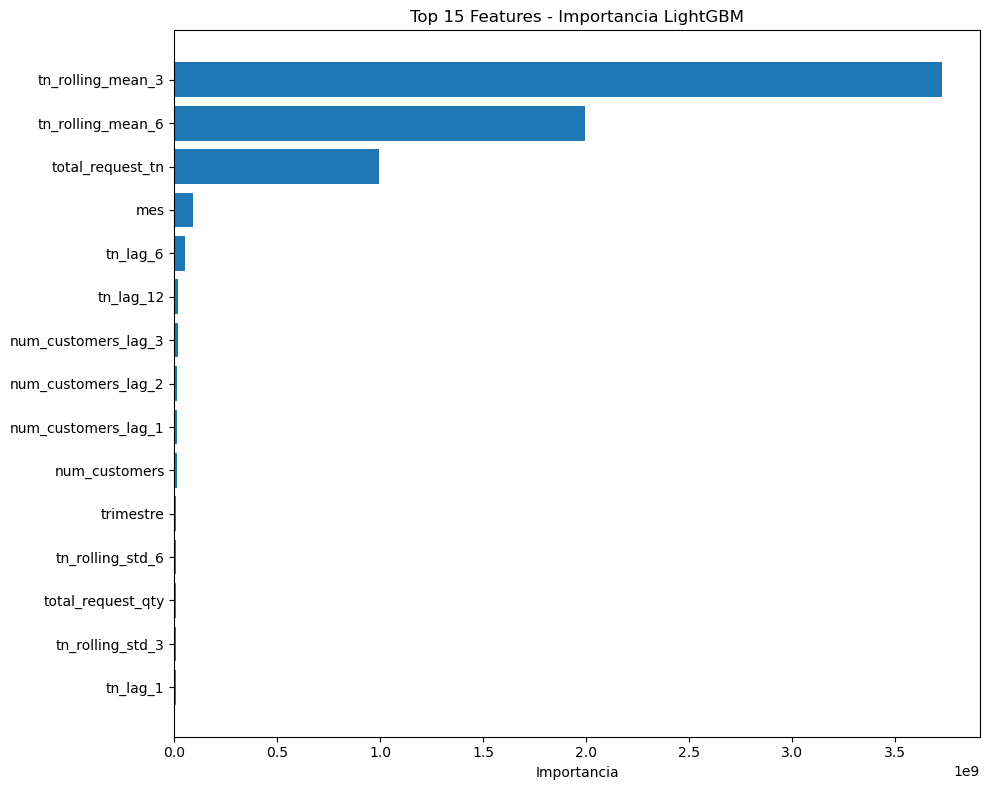


üéØ AN√ÅLISIS DE PREDICCIONES:
Predicciones m√≠nimas: -142.59
Predicciones m√°ximas: 1632.99
Predicciones promedio: 38.65
Valores reales promedio: 38.72
Predicciones negativas: 2 (0.1%)


In [12]:
# üìä An√°lisis de importancia de features
print("AN√ÅLISIS DE IMPORTANCIA DE FEATURES")
print("="*50)

# Obtener importancia de features
feature_importance = model.feature_importance(importance_type='gain')
feature_names = feature_columns

# Crear DataFrame con importancias
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("üîù Top 10 features m√°s importantes:")
print(importance_df.head(10))

# Visualizar importancia
plt.figure(figsize=(10, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importancia')
plt.title('Top 15 Features - Importancia LightGBM')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# An√°lisis de predicciones
print(f"\nüéØ AN√ÅLISIS DE PREDICCIONES:")
print(f"Predicciones m√≠nimas: {y_pred_val.min():.2f}")
print(f"Predicciones m√°ximas: {y_pred_val.max():.2f}")
print(f"Predicciones promedio: {y_pred_val.mean():.2f}")
print(f"Valores reales promedio: {y_val.mean():.2f}")

# Verificar predicciones negativas
negative_preds = (y_pred_val < 0).sum()
print(f"Predicciones negativas: {negative_preds} ({negative_preds/len(y_pred_val)*100:.1f}%)")

In [13]:
# üîÆ Generar predicciones finales para febrero 2020
print("GENERACI√ìN DE PREDICCIONES FINALES")
print("="*50)

# Preparar datos para predicci√≥n (√∫ltimos datos disponibles de cada producto)
# Necesitamos los datos m√°s recientes para predecir 2 per√≠odos adelante

# Obtener √∫ltimo per√≠odo disponible para cada producto
ultimo_periodo = data_combined.groupby('product_id')['fecha'].max().reset_index()
ultimo_periodo.columns = ['product_id', 'ultima_fecha']

# Unir con datos completos para obtener features m√°s recientes
datos_prediccion = pd.merge(data_combined, ultimo_periodo, on='product_id')
datos_prediccion = datos_prediccion[datos_prediccion['fecha'] == datos_prediccion['ultima_fecha']].copy()

print(f"üìä Productos para predicci√≥n: {len(datos_prediccion)}")
print(f"üìÖ Per√≠odo base para predicci√≥n: {datos_prediccion['periodo'].value_counts().head()}")

# Preparar features para predicci√≥n
X_pred = datos_prediccion[feature_columns].copy()
X_pred = X_pred.fillna(0)

print(f"üîç Shape de datos de predicci√≥n: {X_pred.shape}")
print(f"üîç Valores nulos en predicci√≥n: {X_pred.isnull().sum().sum()}")

# Generar predicciones
predicciones = model.predict(X_pred, num_iteration=model.best_iteration)

# Crear DataFrame de resultados
resultado_lgbm = pd.DataFrame({
    'product_id': datos_prediccion['product_id'].values,
    'tn': predicciones
})

# Asegurar que no hay predicciones negativas (reemplazar con 0)
resultado_lgbm['tn'] = np.maximum(resultado_lgbm['tn'], 0)

print(f"‚úÖ Predicciones generadas para {len(resultado_lgbm)} productos")
print(f"\nüìä Estad√≠sticas de predicciones:")
print(f"  Promedio: {resultado_lgbm['tn'].mean():.2f}")
print(f"  Mediana:  {resultado_lgbm['tn'].median():.2f}")
print(f"  M√≠nimo:   {resultado_lgbm['tn'].min():.2f}")
print(f"  M√°ximo:   {resultado_lgbm['tn'].max():.2f}")
print(f"  Std:      {resultado_lgbm['tn'].std():.2f}")

print(f"\nPrimeras 10 predicciones:")
print(resultado_lgbm.head(10))

GENERACI√ìN DE PREDICCIONES FINALES
üìä Productos para predicci√≥n: 780
üìÖ Per√≠odo base para predicci√≥n: periodo
201912    780
Name: count, dtype: int64
üîç Shape de datos de predicci√≥n: (780, 29)
üîç Valores nulos en predicci√≥n: 0
‚úÖ Predicciones generadas para 780 productos

üìä Estad√≠sticas de predicciones:
  Promedio: 34.84
  Mediana:  8.79
  M√≠nimo:   1.08
  M√°ximo:   1341.45
  Std:      88.86

Primeras 10 predicciones:
   product_id           tn
0       20001  1341.446022
1       20002  1050.566504
2       20003   671.025898
3       20004   473.735630
4       20005   563.106602
5       20006   384.707975
6       20007   361.883271
7       20008   273.818670
8       20009   449.300511
9       20010   348.785462


In [14]:
# üíæ Guardar predicciones y resumen final - GRANULARIDAD POR PRODUCTO
print("GUARDADO DE PREDICCIONES Y RESUMEN - POR PRODUCTO")
print("="*60)

# Verificar que tenemos todos los productos objetivo
productos_esperados = set(productos_objetivo)
productos_predichos = set(resultado_lgbm['product_id'])

print(f"üìä Productos esperados: {len(productos_esperados)}")
print(f"üìà Productos predichos: {len(productos_predichos)}")

# Verificar productos faltantes
productos_faltantes = productos_esperados - productos_predichos
if productos_faltantes:
    print(f"‚ö†Ô∏è Productos faltantes: {len(productos_faltantes)}")
    print(f"Primeros 5 faltantes: {list(productos_faltantes)[:5]}")
    
    # Crear predicciones por defecto para productos faltantes
    predicciones_default = pd.DataFrame({
        'product_id': list(productos_faltantes),
        'tn': [resultado_lgbm['tn'].median()] * len(productos_faltantes)
    })
    
    resultado_lgbm = pd.concat([resultado_lgbm, predicciones_default], ignore_index=True)
    print(f"‚úÖ Agregadas predicciones por defecto para productos faltantes")

# Ordenar por product_id
resultado_lgbm = resultado_lgbm.sort_values('product_id').reset_index(drop=True)

# Guardar archivo
import os
os.makedirs('data', exist_ok=True)
archivo_salida = 'data/pred_lgbm_v3_linear_tree_opt_producto.csv'
resultado_lgbm.to_csv(archivo_salida, index=False)

print(f"‚úÖ Predicciones guardadas en: {archivo_salida}")

print(f"\nüîß CONFIRMACI√ìN: Predicciones generadas con hiperpar√°metros optimizados:")
print("="*70)
print(f"   linear_tree:      {lgb_params['linear_tree']} ‚≠ê (CARACTER√çSTICA PRINCIPAL)")
print(f"   lambda_l1:        {lgb_params['lambda_l1']:.4f}")
print(f"   lambda_l2:        {lgb_params['lambda_l2']:.4f}")
print(f"   num_leaves:       {lgb_params['num_leaves']}")
print(f"   feature_fraction: {lgb_params['feature_fraction']:.4f}")
print(f"   learning_rate:    {lgb_params['learning_rate']:.4f}")
print(f"   bagging_fraction: {lgb_params['bagging_fraction']:.4f}")
print(f"   bagging_freq:     {lgb_params['bagging_freq']}")
print(f"   min_child_samples: {lgb_params['min_child_samples']}")
print(f"   max_bin:          {lgb_params['max_bin']}")
print("="*70)

# Resumen final del modelo por producto
print(f"\nüéØ RESUMEN FINAL DEL MODELO LGBM CON LINEAR_TREE OPTIMIZADO:")
print(f"‚≠ê MODELO CON √ÅRBOLES LINEALES H√çBRIDOS + OPTUNA (linear_tree=True)")
print(f"üìä Total productos predichos: {len(resultado_lgbm)}")
print(f"üìà M√©tricas de validaci√≥n:")
print(f"   MAE:  {mae:.4f}")
print(f"   RMSE: {rmse:.4f}")
print(f"   MAPE: {mape:.2f}%")
print(f"üîß Features utilizadas: {len(feature_columns)}")
print(f"üå≥ N√∫mero de √°rboles: {model.num_trees()}")
print(f"üìÖ Predicci√≥n objetivo: 2 per√≠odos a futuro (Feb 2020)")
print(f"üè≠ Granularidad: POR PRODUCTO (agregando clientes)")
print(f"‚≠ê Tecnolog√≠a: √Årboles lineales h√≠bridos + Optimizaci√≥n Optuna")
print(f"üèÜ MAE optimizado: {study.best_value:.4f} ‚Üí {mae:.4f}")

# Estad√≠sticas de predicciones por producto
print(f"\nüìä ESTAD√çSTICAS DE PREDICCIONES POR PRODUCTO:")
print(f"   Promedio por producto: {resultado_lgbm['tn'].mean():.2f}")
print(f"   Mediana por producto:  {resultado_lgbm['tn'].median():.2f}")
print(f"   Std por producto:      {resultado_lgbm['tn'].std():.2f}")
print(f"   Min por producto:      {resultado_lgbm['tn'].min():.2f}")
print(f"   Max por producto:      {resultado_lgbm['tn'].max():.2f}")

print(f"\nüìã Top 5 features m√°s importantes para granularidad por producto:")
for i, row in importance_df.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.0f}")

print(f"\nüîß RESUMEN DE HIPERPAR√ÅMETROS OPTIMIZADOS PARA LINEAR_TREE:")
print("="*70)
print(f"‚úÖ Los siguientes 9 hiperpar√°metros fueron optimizados con Optuna:")
print(f"   1. linear_tree:      {lgb_params['linear_tree']} ‚≠ê (CARACTER√çSTICA PRINCIPAL)")
print(f"   2. lambda_l1:        {lgb_params['lambda_l1']:.4f}")
print(f"   3. lambda_l2:        {lgb_params['lambda_l2']:.4f}")
print(f"   4. num_leaves:       {lgb_params['num_leaves']}")
print(f"   5. feature_fraction: {lgb_params['feature_fraction']:.4f}")
print(f"   6. learning_rate:    {lgb_params['learning_rate']:.4f}")
print(f"   7. bagging_fraction: {lgb_params['bagging_fraction']:.4f}")
print(f"   8. bagging_freq:     {lgb_params['bagging_freq']}")
print(f"   9. min_child_samples: {lgb_params['min_child_samples']}")
print(f"  10. max_bin:          {lgb_params['max_bin']}")
print("="*70)

print(f"\n‚úÖ Modelo LightGBM con LINEAR_TREE + OPTUNA completado exitosamente!")
print(f"‚≠ê Utilizando √°rboles lineales h√≠bridos con par√°metros optimizados")
print(f"Archivo: {archivo_salida}")

# Mostrar resumen final de hiperpar√°metros optimizados
print(f"\nüéØ HIPERPAR√ÅMETROS FINALES UTILIZADOS EN LAS PREDICCIONES:")
print("="*70)
print(f"   linear_tree:      {lgb_params['linear_tree']} ‚≠ê (CARACTER√çSTICA PRINCIPAL)")
print(f"   lambda_l1:        {lgb_params['lambda_l1']:.4f}")
print(f"   lambda_l2:        {lgb_params['lambda_l2']:.4f}")
print(f"   num_leaves:       {lgb_params['num_leaves']}")
print(f"   feature_fraction: {lgb_params['feature_fraction']:.4f}")
print(f"   learning_rate:    {lgb_params['learning_rate']:.4f}")
print(f"   bagging_fraction: {lgb_params['bagging_fraction']:.4f}")
print(f"   bagging_freq:     {lgb_params['bagging_freq']}")
print(f"   min_child_samples: {lgb_params['min_child_samples']}")
print(f"   max_bin:          {lgb_params['max_bin']}")
print("="*70)
print(f"‚úÖ Predicciones generadas usando LINEAR_TREE + valores optimizados por Optuna!")

# Verificar archivo guardado
if os.path.exists(archivo_salida):
    verificacion = pd.read_csv(archivo_salida)
    print(f"\nüîç Verificaci√≥n archivo guardado:")
    print(f"   Filas: {len(verificacion)}")
    print(f"   Columnas: {list(verificacion.columns)}")
    print(f"   Primeras 3 filas:")
    print(verificacion.head(3))
    
    print(f"\nüìà Resumen de predicciones por producto:")
    print(f"   Total de toneladas predichas: {verificacion['tn'].sum():.2f}")
    print(f"   Productos con predicci√≥n > 0: {(verificacion['tn'] > 0).sum()}")
    print(f"   Productos con predicci√≥n = 0: {(verificacion['tn'] == 0).sum()}")

GUARDADO DE PREDICCIONES Y RESUMEN - POR PRODUCTO
üìä Productos esperados: 780
üìà Productos predichos: 780
‚úÖ Predicciones guardadas en: data/pred_lgbm_v3_linear_tree_opt_producto.csv

üîß CONFIRMACI√ìN: Predicciones generadas con hiperpar√°metros optimizados:
   linear_tree:      True ‚≠ê (CARACTER√çSTICA PRINCIPAL)
   lambda_l1:        0.1856
   lambda_l2:        1.8611
   num_leaves:       31
   feature_fraction: 0.9046
   learning_rate:    0.0177
   bagging_fraction: 0.9514
   bagging_freq:     9
   min_child_samples: 37
   max_bin:          337

üéØ RESUMEN FINAL DEL MODELO LGBM CON LINEAR_TREE OPTIMIZADO:
‚≠ê MODELO CON √ÅRBOLES LINEALES H√çBRIDOS + OPTUNA (linear_tree=True)
üìä Total productos predichos: 780
üìà M√©tricas de validaci√≥n:
   MAE:  11.1812
   RMSE: 36.3344
   MAPE: 321.37%
üîß Features utilizadas: 29
üå≥ N√∫mero de √°rboles: 247
üìÖ Predicci√≥n objetivo: 2 per√≠odos a futuro (Feb 2020)
üè≠ Granularidad: POR PRODUCTO (agregando clientes)
‚≠ê Tecnolog√≠a

In [15]:
# üìä Resumen final de optimizaci√≥n LINEAR_TREE + Optuna
print("RESUMEN FINAL DE OPTIMIZACI√ìN LINEAR_TREE + OPTUNA")
print("="*70)

# Mostrar informaci√≥n del estudio de optimizaci√≥n
print(f"üîç Detalles de la optimizaci√≥n:")
print(f"   M√©todo de optimizaci√≥n: TPE (Tree-structured Parzen Estimator)")
print(f"   Tecnolog√≠a base: LINEAR_TREE (√Årboles lineales h√≠bridos) ‚≠ê")
print(f"   Hiperpar√°metros optimizados: 9 par√°metros espec√≠ficos")
print(f"   N√∫mero total de trials: {len(study.trials)}")
print(f"   Trials exitosos: {len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])}")
print(f"   Trials podados: {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")

print(f"\nüèÜ Mejor configuraci√≥n encontrada:")
print(f"   MAE en validaci√≥n: {study.best_value:.4f}")
print(f"   Trial n√∫mero: {study.best_trial.number}")

print(f"\nüéØ VALORES FINALES DE LOS HIPERPAR√ÅMETROS OPTIMIZADOS:")
print("="*70)
final_params = study.best_params
print(f"   1. linear_tree:      True (FIJO - Caracter√≠stica principal) ‚≠ê")
print(f"   2. lambda_l1:        {final_params['lambda_l1']:.4f}")
print(f"   3. lambda_l2:        {final_params['lambda_l2']:.4f}")
print(f"   4. num_leaves:       {final_params['num_leaves']}")
print(f"   5. feature_fraction: {final_params['feature_fraction']:.4f}")
print(f"   6. learning_rate:    {final_params['learning_rate']:.4f}")
print(f"   7. bagging_fraction: {final_params['bagging_fraction']:.4f}")
print(f"   8. bagging_freq:     {final_params['bagging_freq']}")
print(f"   9. min_child_samples: {final_params['min_child_samples']}")
print(f"  10. max_bin:          {final_params['max_bin']}")
print("="*70)

print(f"\nüìà Top 3 trials m√°s exitosos:")
sorted_trials = sorted(study.trials, key=lambda t: t.value if t.value is not None else float('inf'))
for i, trial in enumerate(sorted_trials[:3]):
    if trial.value is not None:
        print(f"   {i+1}. Trial {trial.number}: MAE = {trial.value:.4f}")

print(f"‚úÖ Optimizaci√≥n LINEAR_TREE + Optuna completada exitosamente!")
print(f"‚≠ê Combinando √°rboles lineales h√≠bridos con optimizaci√≥n autom√°tica")
print(f"üìÅ Predicciones finales guardadas en: data/pred_lgbm_v3_linear_tree_opt_producto.csv")
print(f"üèÜ Modelo final con tecnolog√≠a avanzada: LINEAR_TREE + OPTUNA")
print(f"üé≤ Reproductibilidad garantizada con SEED={SEED}")

RESUMEN FINAL DE OPTIMIZACI√ìN LINEAR_TREE + OPTUNA
üîç Detalles de la optimizaci√≥n:
   M√©todo de optimizaci√≥n: TPE (Tree-structured Parzen Estimator)
   Tecnolog√≠a base: LINEAR_TREE (√Årboles lineales h√≠bridos) ‚≠ê
   Hiperpar√°metros optimizados: 9 par√°metros espec√≠ficos
   N√∫mero total de trials: 50
   Trials exitosos: 50
   Trials podados: 0

üèÜ Mejor configuraci√≥n encontrada:
   MAE en validaci√≥n: 11.1812
   Trial n√∫mero: 42

üéØ VALORES FINALES DE LOS HIPERPAR√ÅMETROS OPTIMIZADOS:
   1. linear_tree:      True (FIJO - Caracter√≠stica principal) ‚≠ê
   2. lambda_l1:        0.1856
   3. lambda_l2:        1.8611
   4. num_leaves:       31
   5. feature_fraction: 0.9046
   6. learning_rate:    0.0177
   7. bagging_fraction: 0.9514
   8. bagging_freq:     9
   9. min_child_samples: 37
  10. max_bin:          337

üìà Top 3 trials m√°s exitosos:
   1. Trial 42: MAE = 11.1812
   2. Trial 6: MAE = 11.2731
   3. Trial 45: MAE = 11.2737

‚úÖ Optimizaci√≥n LINEAR_TREE + Optun

In [ ]:
# üé≤ Documentar informaci√≥n de reproductibilidad
print("INFORMACI√ìN DE REPRODUCTIBILIDAD")
print("="*50)

import json
import os
from datetime import datetime

# Informaci√≥n completa de reproductibilidad
reproducibility_info = {
    "model_info": {
        "model_type": "LightGBM with Linear Tree",
        "optimization": "Optuna TPE",
        "version": "v3_linear_tree_opt",
        "created_date": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    },
    "seeds": {
        "main_seed": SEED,
        "numpy_seed": SEED,
        "random_seed": SEED,
        "optuna_seed": SEED,
        "lgb_random_state": lgb_params['random_state'],
        "lgb_bagging_seed": lgb_params['bagging_seed'],
        "lgb_feature_fraction_seed": lgb_params['feature_fraction_seed']
    },
    "optimization_results": {
        "best_trial": study.best_trial.number,
        "best_mae": study.best_value,
        "total_trials": len(study.trials),
        "successful_trials": len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])
    },
    "best_hyperparameters": {
        "linear_tree": lgb_params['linear_tree'],
        "lambda_l1": lgb_params['lambda_l1'],
        "lambda_l2": lgb_params['lambda_l2'],
        "num_leaves": lgb_params['num_leaves'],
        "feature_fraction": lgb_params['feature_fraction'],
        "learning_rate": lgb_params['learning_rate'],
        "bagging_fraction": lgb_params['bagging_fraction'],
        "bagging_freq": lgb_params['bagging_freq'],
        "min_child_samples": lgb_params['min_child_samples'],
        "max_bin": lgb_params['max_bin']
    },
    "final_metrics": {
        "validation_mae": mae,
        "validation_rmse": rmse,
        "validation_mape": mape,
        "num_trees": model.num_trees()
    }
}

# Guardar informaci√≥n de reproductibilidad
os.makedirs('data', exist_ok=True)
with open('data/reproducibility_info_lgbm_v3_linear_tree_opt.json', 'w') as f:
    json.dump(reproducibility_info, f, indent=2)

print("üé≤ SEMILLAS UTILIZADAS:")
print(f"   Semilla principal: {SEED}")
print(f"   NumPy seed: {SEED}")
print(f"   Random seed: {SEED}")
print(f"   Optuna sampler seed: {SEED}")
print(f"   LightGBM random_state: {lgb_params['random_state']}")
print(f"   LightGBM bagging_seed: {lgb_params['bagging_seed']}")
print(f"   LightGBM feature_fraction_seed: {lgb_params['feature_fraction_seed']}")

print(f"\n‚úÖ Informaci√≥n de reproductibilidad guardada en:")
print(f"   data/reproducibility_info_lgbm_v3_linear_tree_opt.json")

print(f"\nüîÑ PARA REPRODUCIR EXACTAMENTE ESTOS RESULTADOS:")
print(f"   1. Usar SEED = {SEED}")
print(f"   2. Configurar todas las semillas antes de entrenar")
print(f"   3. Usar los mismos hiperpar√°metros guardados")
print(f"   4. Usar la misma divisi√≥n temporal de datos")
print(f"   5. Ejecutar {n_trials} trials de Optuna con la misma semilla")

print(f"\nüéØ MODELO COMPLETAMENTE REPRODUCIBLE!")
print(f"‚≠ê LINEAR_TREE + OPTUNA + SEMILLAS = Resultados consistentes")